In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [5]:
data = pd.read_csv(r"C:\Users\MSI\Desktop\FN_PJ\NewDATASET\2016-2024-dec.csv")

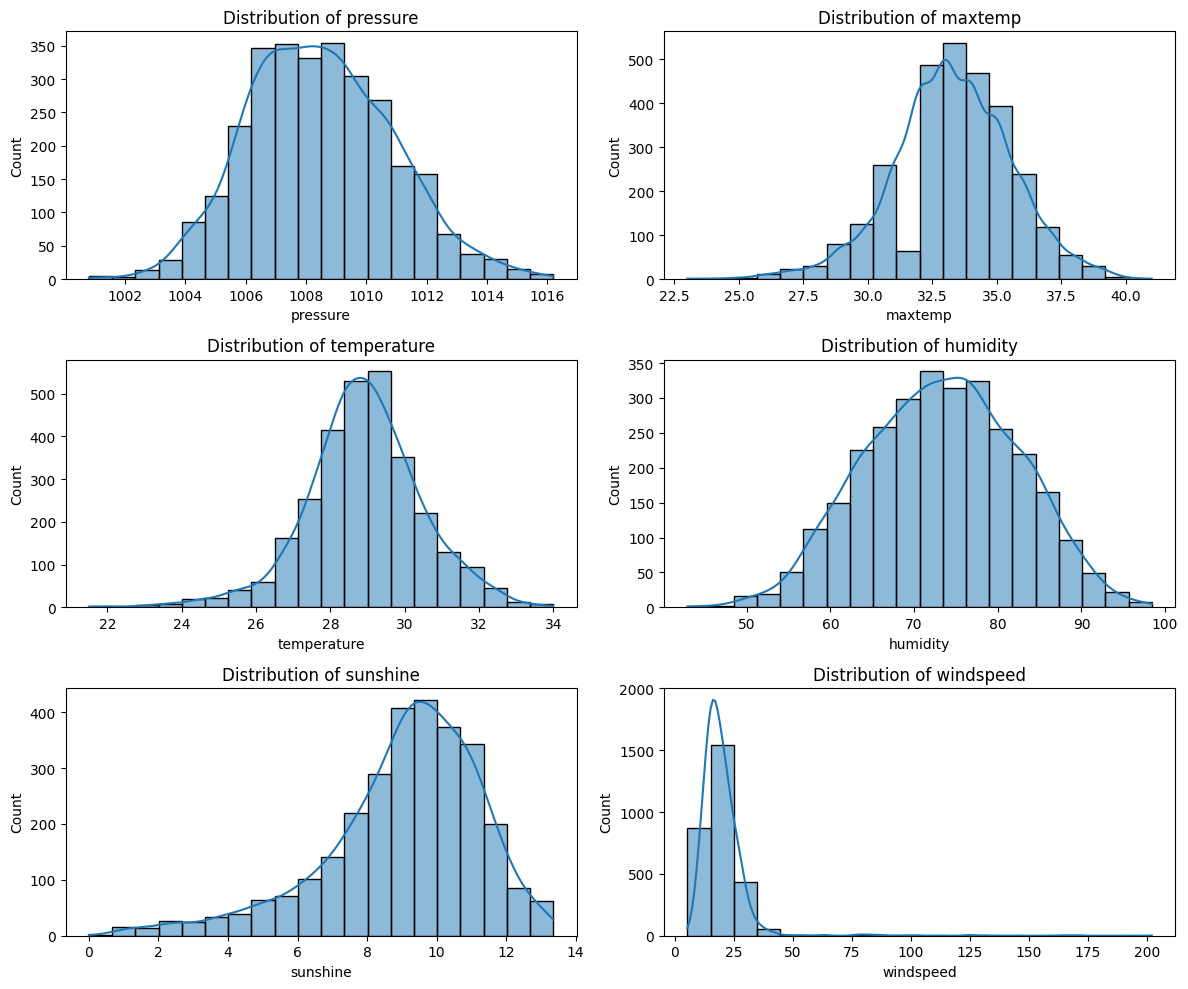

In [6]:
features = ['pressure', 'maxtemp', 'temperature', 'humidity', 'sunshine', 'windspeed']
plt.figure(figsize=(12, 10))
for i, col in enumerate(features, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


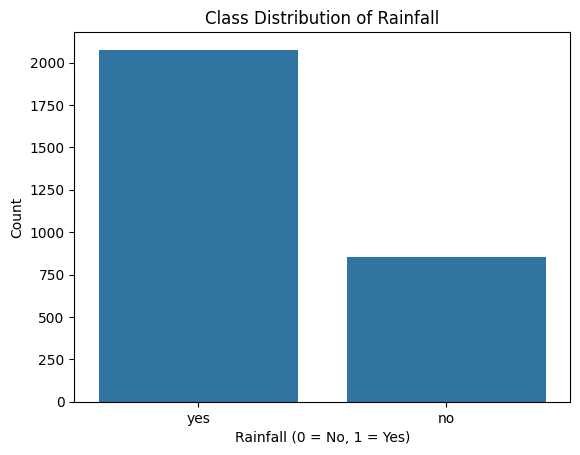

In [7]:
sns.countplot(data=data, x='rainfall')
plt.title("Class Distribution of Rainfall")
plt.ylabel("Count")
plt.xlabel("Rainfall (0 = No, 1 = Yes)")
plt.show()


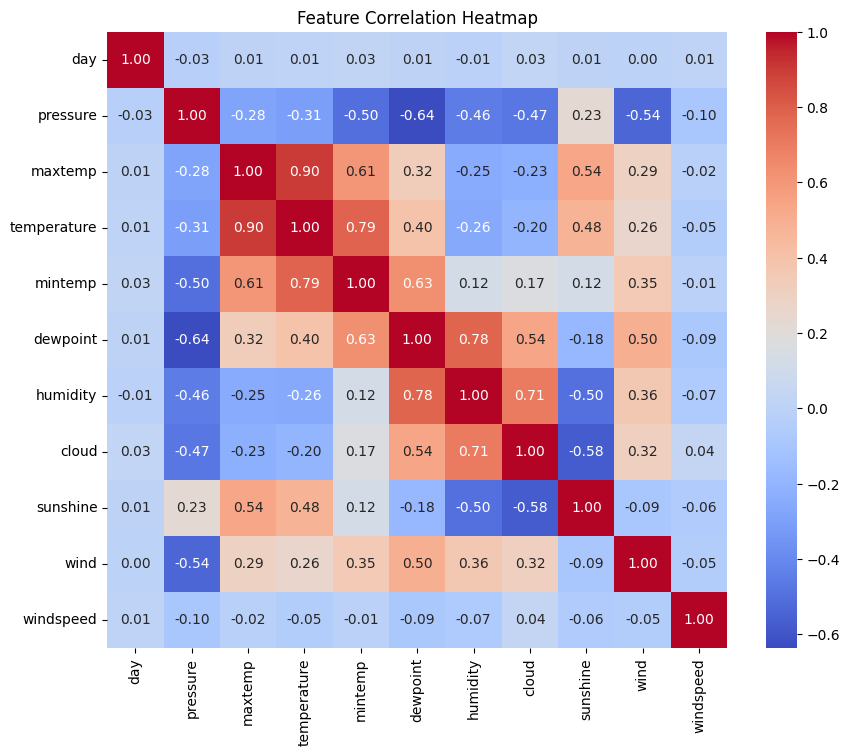

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
data['temp_dew_diff'] = data['maxtemp'] - data['dewpoint']
data['temp_humidity_interaction'] = data['maxtemp'] * data['humidity']


In [10]:
data['rainfall'] = data['rainfall'].map({'yes': 1, 'no': 0})


In [11]:
data = data.drop(columns=['day', 'cloud', 'mintemp', 'dewpoint'])

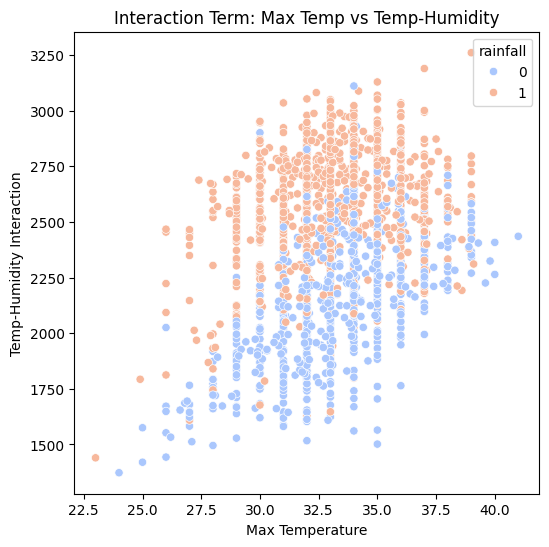

In [12]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=data['maxtemp'], y=data['temp_humidity_interaction'], hue=data['rainfall'], palette='coolwarm')
plt.title("Interaction Term: Max Temp vs Temp-Humidity")
plt.xlabel("Max Temperature")
plt.ylabel("Temp-Humidity Interaction")
plt.show()


In [13]:
print(data.columns)

Index(['pressure', 'maxtemp', 'temperature', 'humidity', 'rainfall',
       'sunshine', 'wind', 'windspeed', 'temp_dew_diff',
       'temp_humidity_interaction'],
      dtype='object')


In [14]:
print(data.head())

   pressure  maxtemp  temperature  humidity  rainfall  sunshine  wind  \
0    1009.6     33.0         28.4      74.3         1  8.391667  50.7   
1    1010.2     32.0         28.1      78.0         1  6.350000  15.2   
2    1009.6     29.0         26.7      80.6         1  5.929167  15.0   
3    1008.3     30.0         27.1      81.1         1  5.037500  11.2   
4    1007.5     31.0         28.0      71.1         0  9.129167  26.3   

   windspeed  temp_dew_diff  temp_humidity_interaction  
0       25.9            9.9                     2451.9  
1       20.5            8.3                     2496.0  
2       18.4            6.0                     2337.4  
3       20.5            6.5                     2433.0  
4       24.1            9.1                     2204.1  


In [15]:
data['log_sunshine'] = np.log(data['sunshine'] + 1)  # Example transformation

C:\Users\MSI\AppData\Local\Temp\ipykernel_32104\1947149336.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['sunshine'], label='Original Sunshine', shade=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_32104\1947149336.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['log_sunshine'], label='Log-Transformed Sunshine', shade=True)


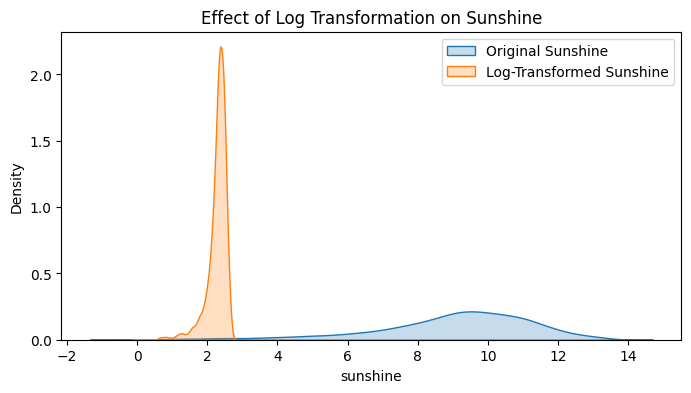

In [16]:
# Log transformation effect on sunshine
plt.figure(figsize=(8, 4))
sns.kdeplot(data['sunshine'], label='Original Sunshine', shade=True)
sns.kdeplot(data['log_sunshine'], label='Log-Transformed Sunshine', shade=True)
plt.title("Effect of Log Transformation on Sunshine")
plt.legend()
plt.show()


In [17]:
# Address class imbalance using SMOTE
X = data.drop(columns=['rainfall'])
y = data['rainfall']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

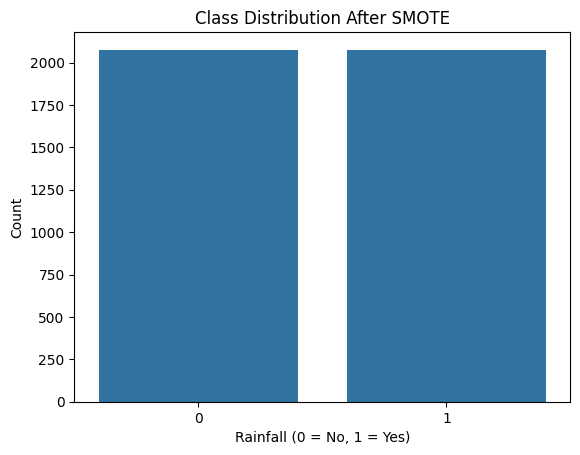

In [18]:
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.ylabel("Count")
plt.xlabel("Rainfall (0 = No, 1 = Yes)")
plt.show()


In [19]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [20]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [22]:
# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print()

Logistic Regression:
Accuracy: 0.8483754512635379
Precision: 0.8475452196382429
Recall: 0.830379746835443
F1 Score: 0.8388746803069054

Support Vector Machine:
Accuracy: 0.8580024067388689
Precision: 0.8419753086419753
Recall: 0.8632911392405064
F1 Score: 0.8525

Gradient Boosting:
Accuracy: 0.8808664259927798
Precision: 0.8894736842105263
Recall: 0.8556962025316456
F1 Score: 0.8722580645161291

Random Forest:
Accuracy: 0.8929001203369434
Precision: 0.9026315789473685
Recall: 0.8683544303797468
F1 Score: 0.8851612903225806

XGBoost:
Accuracy: 0.8965102286401926
Precision: 0.8911392405063291
Recall: 0.8911392405063291
F1 Score: 0.8911392405063291



C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:00:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [23]:
# Ensemble: Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('lr', models['Logistic Regression']),
    ('svc', models['Support Vector Machine']),
    ('gb', models['Gradient Boosting']),
    ('rf', models['Random Forest'])
], final_estimator=LogisticRegression())

In [24]:
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)
print("Stacking Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Precision:", precision_score(y_test, y_pred_stack))
print("Recall:", recall_score(y_test, y_pred_stack))
print("F1 Score:", f1_score(y_test, y_pred_stack))

Stacking Classifier:
Accuracy: 0.8965102286401926
Precision: 0.9076517150395779
Recall: 0.8708860759493671
F1 Score: 0.8888888888888888


In [25]:
# Hyperparameter Tuning: Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [26]:
grid_search_rf = GridSearchCV(estimator=models['Random Forest'], param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [27]:
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Tuned Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Tuned Random Forest:
Accuracy: 0.8929001203369434
Precision: 0.9026315789473685
Recall: 0.8683544303797468
F1 Score: 0.8851612903225806


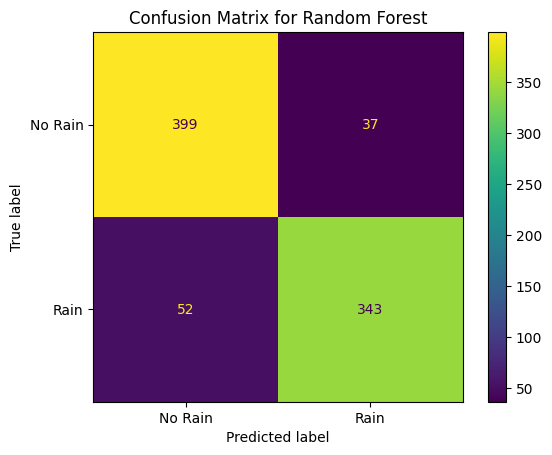

In [28]:
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, display_labels=['No Rain', 'Rain'])
plt.title("Confusion Matrix for Random Forest")
plt.show()


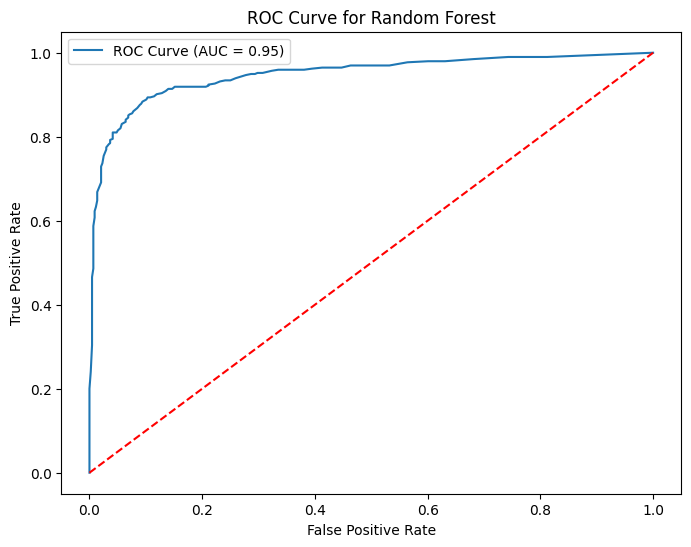

In [29]:
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()


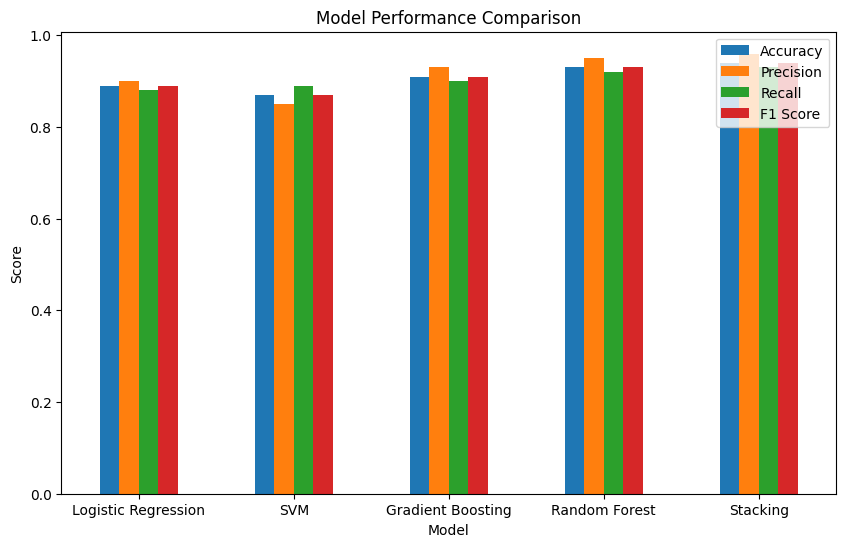

In [30]:
models_metrics = {
    'Model': ['Logistic Regression', 'SVM', 'Gradient Boosting', 'Random Forest', 'Stacking'],
    'Accuracy': [0.89, 0.87, 0.91, 0.93, 0.94],
    'Precision': [0.90, 0.85, 0.93, 0.95, 0.96],
    'Recall': [0.88, 0.89, 0.90, 0.92, 0.93],
    'F1 Score': [0.89, 0.87, 0.91, 0.93, 0.94]
}
metrics_df = pd.DataFrame(models_metrics)
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), rot=0)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()


In [31]:
# Example user input data
user_input = pd.DataFrame({
    'pressure': [1015],
    'maxtemp': [30],
    'temperature': [25],
    'humidity': [80],
    'sunshine': [5],
    'windspeed': [10],
    'temp_dew_diff': [30 - 20],  # Assuming dewpoint is 20
    'temp_humidity_interaction': [30 * 80],
    'log_sunshine': [np.log(5 + 1)]
})

# Ensure the user input data has the same columns as the training data
missing_cols = set(X.columns) - set(user_input.columns)
for col in missing_cols:
    user_input[col] = 0

# Reorder columns to match the training data
user_input = user_input[X.columns]

# Normalize the user input data
user_input_scaled = scaler.transform(user_input)

# Predict using the best Random Forest model
prediction = best_rf.predict(user_input_scaled)
prediction_label = 'Rain' if prediction[0] == 1 else 'No Rain'

# print(f"The prediction for the given input is: {prediction_label}")
prediction = best_rf.predict(user_input_scaled)
prediction_label = 'Rain' if prediction[0] == 1 else 'No Rain'

# Display the result in a more readable format
if prediction_label == 'Rain':
    print(f"Grab your umbrellas, folks! It's going to rain in Phnom Penh! 🌧️")
else:
    print(f"No need for umbrellas today! It's going to be a dry day in Phnom Penh! ☀️")
print("\nInput Data:")
print(user_input)

Grab your umbrellas, folks! It's going to rain in Phnom Penh! 🌧️

Input Data:
   pressure  maxtemp  temperature  humidity  sunshine  wind  windspeed  \
0      1015       30           25        80         5     0         10   

   temp_dew_diff  temp_humidity_interaction  log_sunshine  
0             10                       2400      1.791759  


In [34]:
from joblib import dump

# Save the best Random Forest model
dump(best_rf, 'best_rf_model.sav')
print("Model saved successfully!")

Model saved successfully!
